# Part A

### 1.A. Read the ‘Signals.csv’ as DataFrame and import required libraries.

In [4]:
# Import required libraries.
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import library to perform train test split
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn import preprocessing

# import Standardization library
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from keras.models import Sequential
from keras.utils import to_categorical

from keras.layers import Activation, Dense
from keras import optimizers

In [5]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Read the ‘Signals.csv’ as DataFrame
drivePath = '/content/drive/MyDrive/AIML/projects/NeuralNetwork/'
fileName = 'NN Project Data - Signal.csv'
signalsDataFrame = pd.read_csv(drivePath + fileName)
signalsDataFrame.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
signalsDataFrame.shape

(1599, 12)

In [8]:
signalsDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
signalsDataFrame.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter 2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter 3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter 4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter 5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter 6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter 7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter 8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter 9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter 10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [10]:
signalsDataFrame.Signal_Strength.unique()

array([5, 6, 7, 4, 8, 3])

In [11]:
signalsDataFrame['Signal_Strength'].value_counts()

Signal_Strength
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

### 1.B. Check for missing values and print percentage for each attribute.

In [12]:
signalsDataFrame.isna().sum()/len(signalsDataFrame)

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

In [13]:
signalsDataFrame = signalsDataFrame.dropna()

### 1.C. Check for presence of duplicate records in the dataset and impute with appropriate method.

In [14]:
# Check number of duplicate records
signalsDataFrame.duplicated().sum()

240

- There are 240 duplicate records found. We can simply delete those duplicate records except the first duplicate rows.

In [15]:
# before drop the duplicate records lets copy the dataframe into another variable
signals_df = signalsDataFrame.copy()
signals_df.drop_duplicates(keep = 'first', inplace = True)
signals_df.shape

(1359, 12)

### 1.D. Visualise distribution of the target variable.

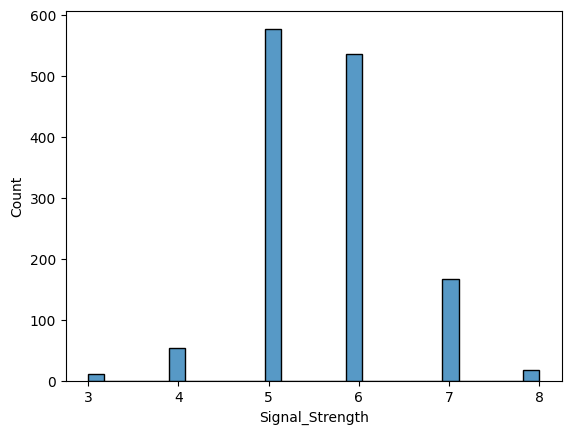

In [16]:
sns.histplot(data = signals_df, x = 'Signal_Strength');

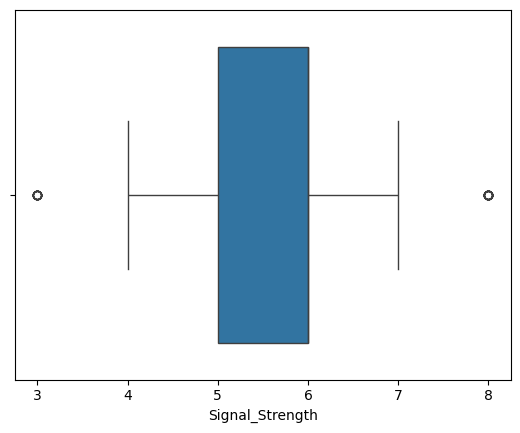

In [17]:
sns.boxplot(data = signals_df, x = 'Signal_Strength');

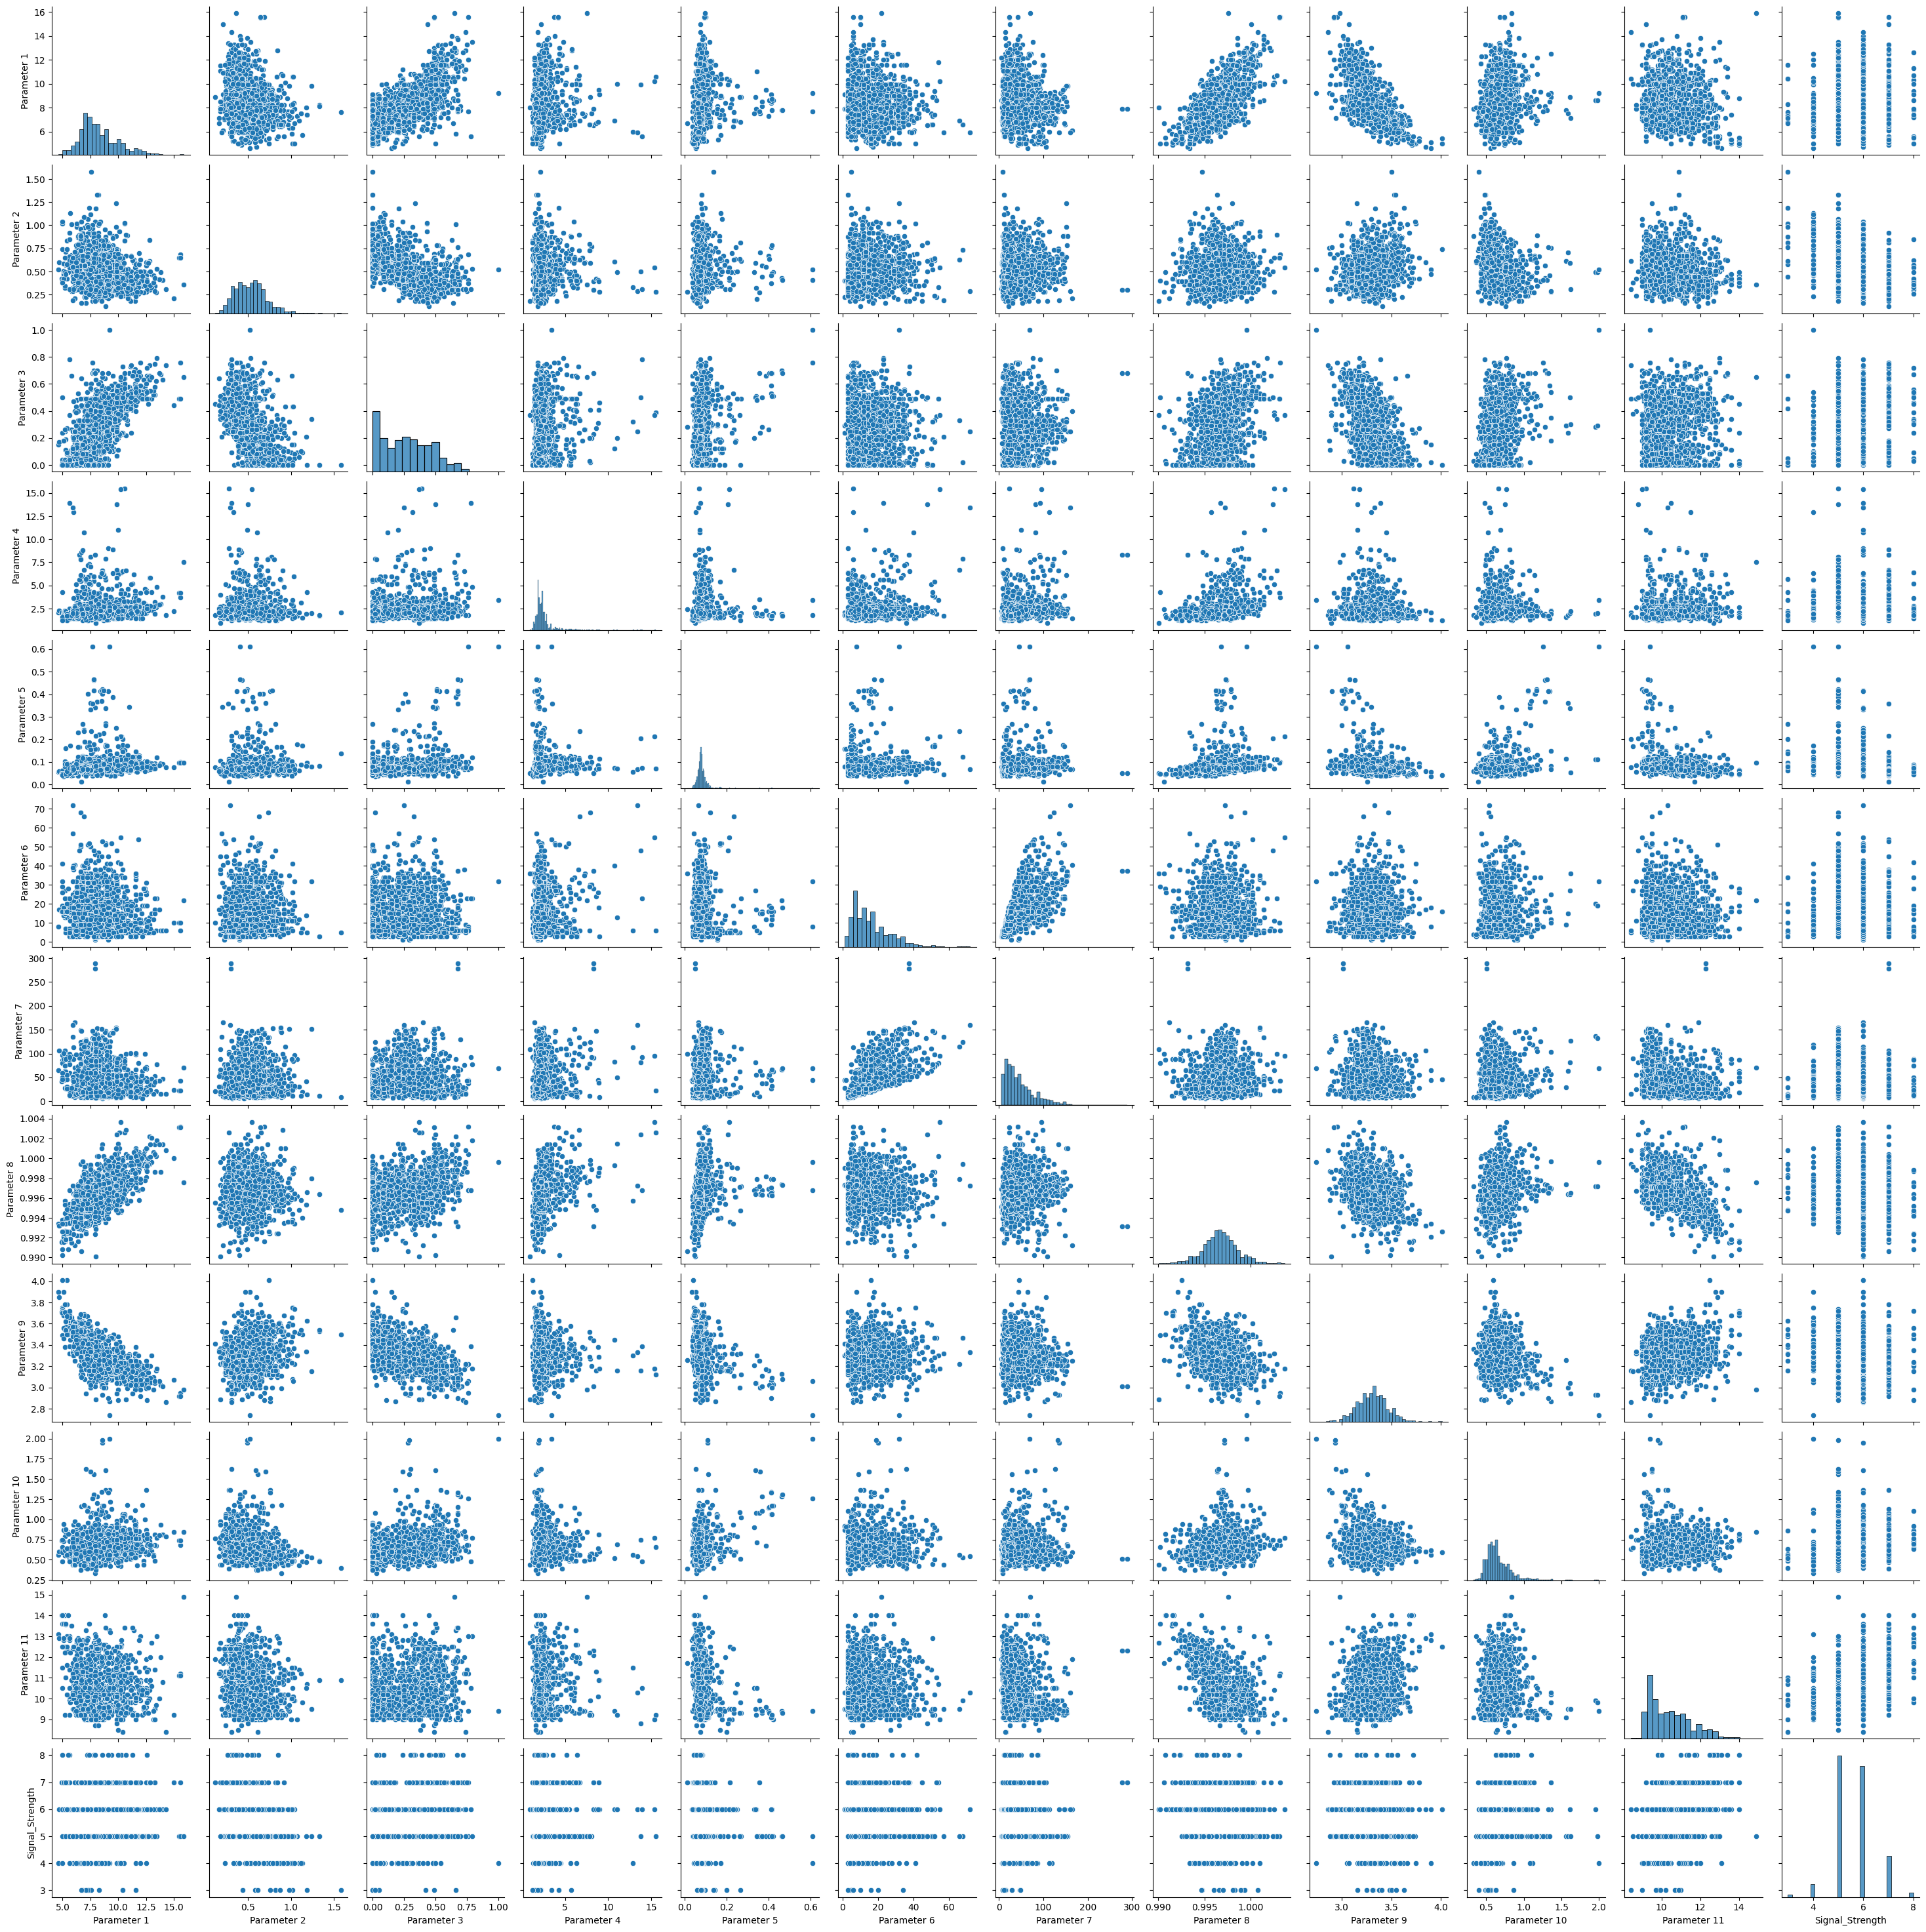

In [18]:
sns.pairplot(data = signals_df);

### 1.E. Share insights from the initial data analysis (at least 2).

#### Insights
- There are 1599 rows and 12 columns in the data frame
- All values are numeric only
- The target column Signal Strength contains integer values between 3 to 8
- 240 records found duplicate, cleaned those rows. So after clean there are 1359 rows in the data frame
- Most of the Signal_Strength are 5 or 6

### 2.A. Split the data into X & Y.

In [19]:
signals_X = signals_df.drop('Signal_Strength', axis = 1)
signals_Y = signals_df['Signal_Strength']

### 2.B. Split the data into train & test with 70:30 proportion.

In [20]:
X_train_sig, X_test_sig, Y_train_sig, Y_test_sig = train_test_split(signals_X, signals_Y, test_size = 0.30, stratify = signals_Y, random_state = 1)

### 2.C. Print shape of all the 4 variables and verify if train and test data is in sync.

In [21]:
print('X train:', X_train_sig.shape, '| X test:', X_test_sig.shape, '| Y train:', Y_train_sig.shape, '| Y test:', Y_test_sig.shape)

X train: (951, 11) | X test: (408, 11) | Y train: (951,) | Y test: (408,)


In [22]:
Y_train_sig.value_counts()

Signal_Strength
5    404
6    374
7    117
4     37
8     12
3      7
Name: count, dtype: int64

In [23]:
Y_test_sig.value_counts()

Signal_Strength
5    173
6    161
7     50
4     16
8      5
3      3
Name: count, dtype: int64

### 2.D. Normalise the train and test data with appropriate method.

In [24]:
scaled_X_train_sig = pd.DataFrame(scaler.fit_transform(X_train_sig))
scaled_X_test_sig = pd.DataFrame(scaler.fit_transform(X_test_sig))
scaled_X_train_sig.columns = X_train_sig.columns
scaled_X_test_sig.columns = X_test_sig.columns

In [25]:
scaled_X_train_sig.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
0,1.402648,-0.150966,0.971389,-0.026726,-0.318863,-1.029546,-0.578278,1.825417,-1.688235,-0.109826,-0.861111
1,0.257556,-0.706894,0.662515,-0.240913,-0.185844,0.336751,0.174367,0.682066,0.856778,-0.109826,-1.142107
2,-1.288319,1.044280,-0.881856,0.044669,-0.762259,-0.248805,-0.578278,-1.702638,1.705115,-0.970467,1.386859
3,0.085792,-1.374008,1.486179,-0.526496,0.102363,1.898233,1.709761,0.083168,-0.056817,0.566391,0.075543
4,-0.944792,-1.374008,0.044767,-0.098122,-1.671221,1.995825,1.619444,-3.325107,-0.317844,-1.646685,1.199528


In [26]:
scaled_X_test_sig.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
0,2.154619,-0.710509,1.893034,-0.277008,-0.376491,-0.893865,-0.629735,1.125743,-1.587526,0.102980,0.752357
1,-0.127805,-1.500608,0.783252,-0.642899,-0.393721,0.489135,0.051350,-1.042803,0.425952,-0.323035,1.291386
2,2.622809,0.342957,1.085920,0.251500,-0.255879,-1.078265,-0.866635,1.435536,-1.084157,-0.482790,0.842195
3,0.047766,0.026918,-0.175196,0.739353,-0.238648,-0.064065,1.887319,0.506159,-0.266181,-0.269783,-0.954566
4,-0.947137,1.001374,-0.931866,2.446841,0.467795,-0.709465,-0.925859,-0.035978,0.237188,-0.908804,0.303167


### 2.E. Transform Labels into format acceptable by Neural Network

In [27]:
le = LabelEncoder()
Y_train_sig = le.fit_transform(Y_train_sig)
Y_test_sig = le.fit_transform(Y_test_sig)

### 3.A. Design a Neural Network to train a classifier.

### 3.B. Train the classifier using previously designed Architecture

### 3.C. Plot 2 separate visuals.

### 3.D. Design new architecture/update existing architecture in attempt to improve the performance of the model.

### 3.E. Plot visuals as in Q3.C and share insights about difference observed in both the models.

# Part B

### 1.A. Read the .h5 file and assign to a variable.

In [28]:
# !pip install h5py

In [29]:
# import numpy as np
import h5py
print(h5py.__version__)

3.9.0


In [30]:
# from google.colab import drive
# drive.mount('/content/drive')

In [31]:
drivePath = '/content/drive/MyDrive/AIML/projects/NeuralNetwork/'
h5FileName = 'Autonomous_Vehicles_SVHN_single_grey1.h5'
f_h5 = h5py.File(drivePath+h5FileName, 'r')

### 1.B. Print all the keys from the .h5 file.

In [32]:
list(f_h5.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

### 1.C. Split the data into X_train, X_test, Y_train, *Y_test*

In [33]:
X_train_img, X_test_img, Y_train_img, Y_test_img = f_h5['X_train'], f_h5['X_test'], f_h5['y_train'], f_h5['y_test']

In [34]:
print(type(X_train_img), type(X_test_img), type(Y_train_img), type(Y_test_img))

<class 'h5py._hl.dataset.Dataset'> <class 'h5py._hl.dataset.Dataset'> <class 'h5py._hl.dataset.Dataset'> <class 'h5py._hl.dataset.Dataset'>


In [35]:
# lets change the type from h5py dataset to numpy array
X_train_img, X_test_img, Y_train_img, Y_test_img = X_train_img[:], X_test_img[:], Y_train_img[:], Y_test_img[:]
print(type(X_train_img), type(X_test_img), type(Y_train_img), type(Y_test_img))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


### 2.A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.

In [36]:
print('X train:', X_train_img.shape, '| X test:', X_test_img.shape, '| Y train:', Y_train_img.shape, '| Y test:', Y_test_img.shape)

X train: (42000, 32, 32) | X test: (18000, 32, 32) | Y train: (42000,) | Y test: (18000,)


### 2.B. Visualise first 10 images in train data and print its corresponding labels.

In [37]:
import matplotlib.pyplot as plt

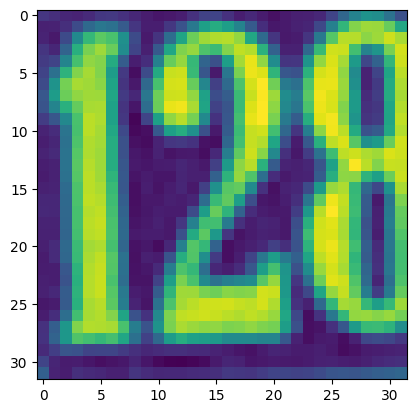


index:  0 | Label:  2
_______________________________________________________ 



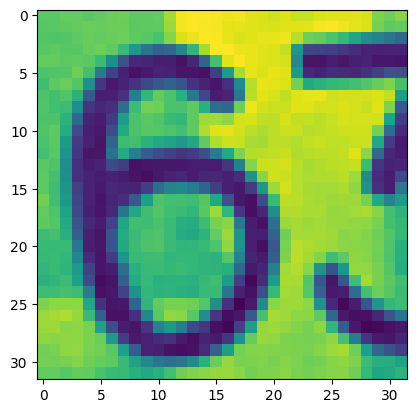


index:  1 | Label:  6
_______________________________________________________ 



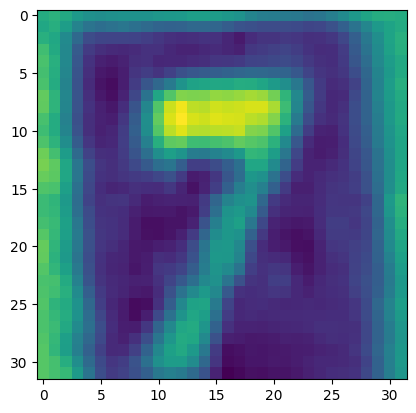


index:  2 | Label:  7
_______________________________________________________ 



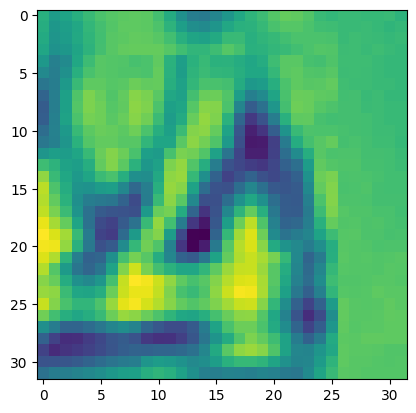


index:  3 | Label:  4
_______________________________________________________ 



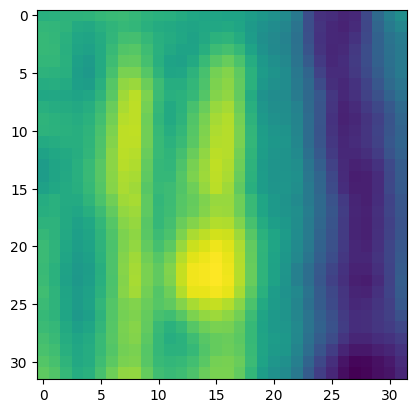


index:  4 | Label:  4
_______________________________________________________ 



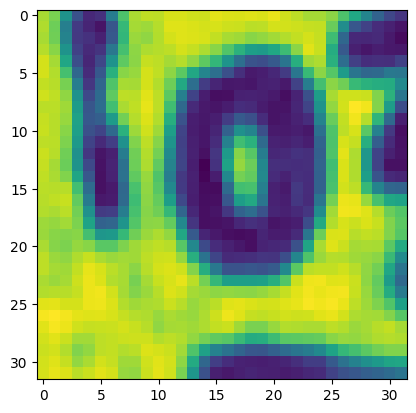


index:  5 | Label:  0
_______________________________________________________ 



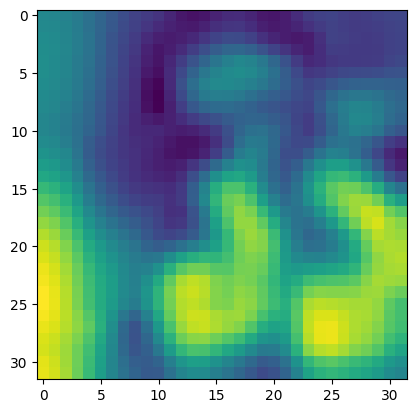


index:  6 | Label:  3
_______________________________________________________ 



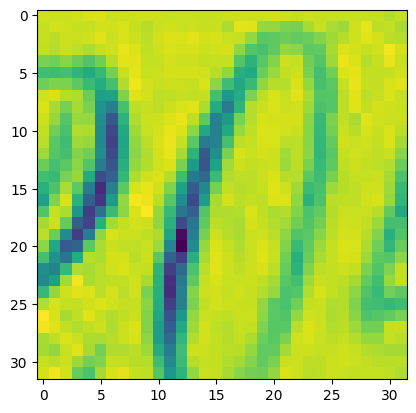


index:  7 | Label:  0
_______________________________________________________ 



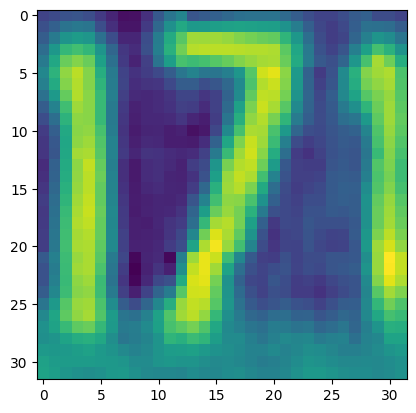


index:  8 | Label:  7
_______________________________________________________ 



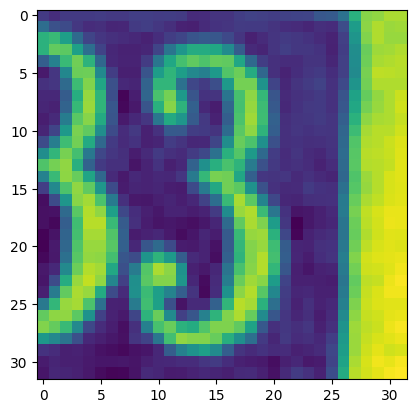


index:  9 | Label:  3
_______________________________________________________ 



In [38]:
for i in np.arange(10):
  plt.imshow(X_train_img[i])    # show first number in the dataset
  plt.show()
  print('\nindex: ', i, '| Label: ', Y_train_img[i])
  print('_' * 55, '\n')

### 2.C. Reshape all the images with appropriate shape update the data in same variable.

In [39]:
X_train_img = X_train_img.reshape((X_train_img.shape[0], -1))
X_test_img = X_test_img.reshape((X_test_img.shape[0], -1))
print('X train:', X_train_img.shape, '| X test:', X_test_img.shape, '| Y train:', Y_train_img.shape, '| Y test:', Y_test_img.shape)

X train: (42000, 1024) | X test: (18000, 1024) | Y train: (42000,) | Y test: (18000,)


### 2.D. Normalise the images i.e. Normalise the pixel values.

In [40]:
scaled_X_train_img = pd.DataFrame(scaler.fit_transform(X_train_img))
scaled_X_test_img = pd.DataFrame(scaler.fit_transform(X_test_img))

### 2.E. Transform Labels into format acceptable by Neural Network

In [41]:
Y_train_img = to_categorical(Y_train_img)
Y_test_img = to_categorical(Y_test_img)

### 2.F. Print total Number of classes in the Dataset

In [42]:
print(Y_train_img.shape)

(42000, 10)


### 3.A. Design a Neural Network to train a classifier

In [43]:
model_img_1 = Sequential()

model_img_1.add(Dense(50, input_shape = (1024, )))
model_img_1.add(Activation('sigmoid'))
model_img_1.add(Dense(50))
model_img_1.add(Activation('sigmoid'))
model_img_1.add(Dense(50))
model_img_1.add(Activation('sigmoid'))
model_img_1.add(Dense(50))
model_img_1.add(Activation('sigmoid'))
model_img_1.add(Dense(10))
model_img_1.add(Activation('softmax'))

In [45]:
sgd = optimizers.SGD(learning_rate = 0.01)

In [47]:
model_img_1.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

### 3.B. Train the classifier using previously designed Architecture (Use best suitable parameters).

In [51]:
history_img_1 = model_img_1.fit(scaled_X_train_img, Y_train_img, batch_size = 500, epochs = 10, verbose = 1)

Epoch 1/10
84/84 [==============================] - 1s 9ms/step - loss: 2.3025 - accuracy: 0.1015
Epoch 2/10
84/84 [==============================] - 1s 9ms/step - loss: 2.3025 - accuracy: 0.1024
Epoch 3/10
84/84 [==============================] - 1s 12ms/step - loss: 2.3025 - accuracy: 0.1033
Epoch 4/10
84/84 [==============================] - 1s 13ms/step - loss: 2.3025 - accuracy: 0.1020
Epoch 5/10
84/84 [==============================] - 1s 13ms/step - loss: 2.3025 - accuracy: 0.1035
Epoch 6/10
84/84 [==============================] - 1s 13ms/step - loss: 2.3025 - accuracy: 0.1018
Epoch 7/10
84/84 [==============================] - 1s 10ms/step - loss: 2.3025 - accuracy: 0.1028
Epoch 8/10
84/84 [==============================] - 1s 8ms/step - loss: 2.3025 - accuracy: 0.1016
Epoch 9/10
84/84 [==============================] - 1s 9ms/step - loss: 2.3025 - accuracy: 0.1028
Epoch 10/10
84/84 [==============================] - 1s 8ms/step - loss: 2.3025 - accuracy: 0.1074


In [54]:
def mlp_model():
    model = Sequential()

    model.add(Dense(50, input_shape = (1024, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))

    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [55]:
model_img_2 = mlp_model()
history_img_2 = model_img_2.fit(scaled_X_train_img, Y_train_img, batch_size=1000, epochs = 20, verbose = 1)

Epoch 1/20
42/42 [==============================] - 3s 15ms/step - loss: 2.4014 - accuracy: 0.0974
Epoch 2/20
42/42 [==============================] - 1s 15ms/step - loss: 2.3385 - accuracy: 0.0981
Epoch 3/20
42/42 [==============================] - 1s 15ms/step - loss: 2.3148 - accuracy: 0.0960
Epoch 4/20
42/42 [==============================] - 1s 14ms/step - loss: 2.3066 - accuracy: 0.0940
Epoch 5/20
42/42 [==============================] - 1s 15ms/step - loss: 2.3040 - accuracy: 0.0941
Epoch 6/20
42/42 [==============================] - 1s 14ms/step - loss: 2.3032 - accuracy: 0.0951
Epoch 7/20
42/42 [==============================] - 1s 14ms/step - loss: 2.3029 - accuracy: 0.0956
Epoch 8/20
42/42 [==============================] - 1s 14ms/step - loss: 2.3028 - accuracy: 0.0954
Epoch 9/20
42/42 [==============================] - 1s 14ms/step - loss: 2.3028 - accuracy: 0.1005
Epoch 10/20
42/42 [==============================] - 1s 14ms/step - loss: 2.3028 - accuracy: 0.1005
Epoch 11/

### 3.C. Evaluate performance of the model with appropriate metrics.

In [52]:
results_img_1 = model_img_1.evaluate(scaled_X_test_img, Y_test_img)

563/563 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1001


In [53]:
print('Test accuracy: ', results_img_1[1])

Test accuracy:  0.10005555301904678


### 3.D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.